<a href="https://colab.research.google.com/github/ToluwaseIdowu/DashboardAnalysis/blob/main/Toluwase_idowu_726_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing all the needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install tensorflow==2.7
!pip install contractions
import contractions
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import nltk

nltk.download('all')
stop_words = set(stopwords.words("english"))
import pickle
from html.parser import HTMLParser
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

### **Importing False News Dataset**

In [ ]:
f_df = pd.read_csv('/content/drive/MyDrive/fakedata.csv')
f_df.drop_duplicates()
f_df.dropna()
f_df.head()

,Unnamed: 0,Date,User,Tweet,Label
0,0,2022-12-13 23:46:18+00:00,madumereodinak1,@hayzedofficial @Moshood_smaq @renoomokri @ken...,1
1,2,2022-12-13 23:24:52+00:00,JBoween,@SaharaReporters All of them are the same Fula...,1
2,4,2022-12-13 23:01:49+00:00,chukwura_a,@officialABAT What happened to akande muiz @of...,1
3,5,2022-12-13 22:47:34+00:00,_Oludaniel_,@SavvyRinu APC is the best and greatest Opposi...,1
4,7,2022-12-13 22:28:52+00:00,ChidoAnyanwu90,@drjeff60 @sakwuru2 @OfficialPDPNig @iyorchiay...,1


In [ ]:
f_df.shape

(24999, 5)

### **Renaming columns and dropping the DATE and User columns in the fake news Dataset**

In [ ]:
f_df = f_df.rename({'Tweet': 'content', 'Unnamed: 0': 'id', 'Label': 'label'}, axis=1)
#f_df.drop(columns =['Date','User'], axis=1, inplace=True)
f_df = f_df[['content','label']]
f_df.head()

,content,label
0,@hayzedofficial @Moshood_smaq @renoomokri @ken...,1
1,@SaharaReporters All of them are the same Fula...,1
2,@officialABAT What happened to akande muiz @of...,1
3,@SavvyRinu APC is the best and greatest Opposi...,1
4,@drjeff60 @sakwuru2 @OfficialPDPNig @iyorchiay...,1


In [ ]:
f_df.shape

(24999, 2)

In [ ]:
f_df.drop_duplicates(subset='content', inplace=True)

In [ ]:
f_df.shape

(24889, 2)

In [ ]:
f_df.head()

,content,label
0,@hayzedofficial @Moshood_smaq @renoomokri @ken...,1
1,@SaharaReporters All of them are the same Fula...,1
2,@officialABAT What happened to akande muiz @of...,1
3,@SavvyRinu APC is the best and greatest Opposi...,1
4,@drjeff60 @sakwuru2 @OfficialPDPNig @iyorchiay...,1


### **Importing Real News Dataset**

In [ ]:
r_df = pd.read_csv('/content/drive/MyDrive/realnews.csv')
r_df.head()

,Id,Date,User,content,Tweet,Label
0,0,2022-12-08 09:50:43+00:00,AIT_Online,AIT_Online Gov Wike makes case for increased ...,Gov Wike makes case for increased female parti...,0
1,1,2022-11-18 09:20:01+00:00,AIT_Online,AIT_Online Niger Politics: Court affirms nomi...,Niger Politics: Court affirms nomination of Li...,0
2,2,2022-11-11 18:29:07+00:00,AIT_Online,AIT_Online Taraba politics: Court sacks Bwach...,Taraba politics: Court sacks Bwacha as senator...,0
3,3,2022-10-27 09:03:32+00:00,AIT_Online,AIT_Online AIT | FIX POLITICS TOWN HALL ON 20...,AIT | FIX POLITICS TOWN HALL ON 2023 ELECTION ...,0
4,4,2022-10-24 16:38:51+00:00,AIT_Online,AIT_Online Plateau Politics: Former minister ...,Plateau Politics: Former minister Nakande dump...,0


In [ ]:
r_df.shape

(19030, 6)

### **Renaming columns and dropping the DATE and User columns in the Real news Dataset**

In [ ]:
r_df.drop(columns=['Date', 'User', 'content', 'Id'],  inplace=True)
r_df.rename({  'Label': 'label', 'Tweet' : 'content'}, axis=1, inplace=True)
r_df.drop_duplicates(subset='content', inplace=True)
r_df.head()


,content,label
0,Gov Wike makes case for increased female parti...,0
1,Niger Politics: Court affirms nomination of Li...,0
2,Taraba politics: Court sacks Bwacha as senator...,0
3,AIT | FIX POLITICS TOWN HALL ON 2023 ELECTION ...,0
4,Plateau Politics: Former minister Nakande dump...,0


In [ ]:
r_df.shape

(17944, 2)

### **Concatenating the Fake news and Real news dataframes**

In [ ]:
df = pd.concat([r_df, f_df], ignore_index=True, sort=False)
# ignore_index, sort
df.tail()

,content,label
42828,"Christians urged to participate in politics, g...",1
42829,Clearly politics in Nigeria means cheating and...,1
42830,@ruffydfire How do u better Nigeria without po...,1
42831,The only reason I gave up on Nigeria is becaus...,1
42832,@asemota I like how you assigned a 50% probabi...,1


### **Feature selection of the columns needed for prediction**

In [ ]:
df = df[['content','label']]
df.head()

,content,label
0,Gov Wike makes case for increased female parti...,0
1,Niger Politics: Court affirms nomination of Li...,0
2,Taraba politics: Court sacks Bwacha as senator...,0
3,AIT | FIX POLITICS TOWN HALL ON 2023 ELECTION ...,0
4,Plateau Politics: Former minister Nakande dump...,0


### **Random shuffling of the dataframe**

In [ ]:
# df = df.sample(frac = 1)
# df.reset_index(inplace = True)
# df.drop(["index"], axis = 1, inplace = True)
# df.columns
# df.head()

### **Checking for Null Values**

In [ ]:
df.isnull().sum()

content    0
label      0
dtype: int64

### **Ploting a Pie-chart to see the percentages of Fake News to Real News**

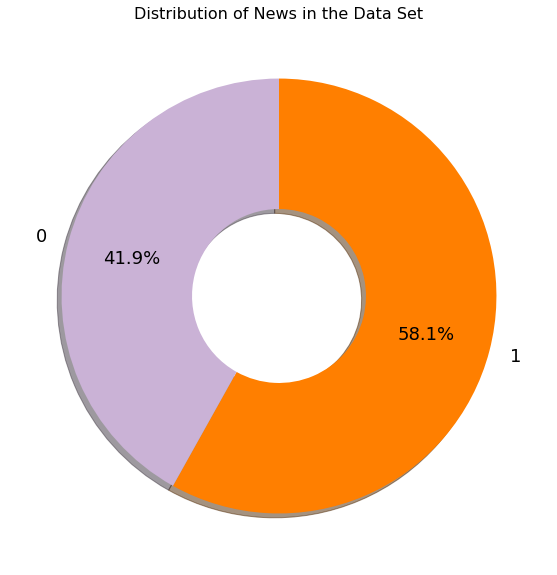

In [ ]:
plt.figure(figsize = (10,10))
sorted_counts = df['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 18}, shadow = True,
        colors = sns.color_palette("Paired")[7:])

plt.title('Distribution of News in the Data Set', fontsize = 16);

### **A Bar Chart to display the number of Fake News to Real News**

In [ ]:
import plotly.express as px
sub_tf_df=df.groupby('label').apply(lambda x:x['content'].count()).reset_index(name='Counts')
sub_tf_df.label.replace({0:'Real News', 1:'Fake News'},inplace=True)
fig = px.bar(sub_tf_df, x="label", y="Counts",
             color='Counts', barmode='group',
             height=700)
fig.show()

### **Creating a function to process the text in the content Column**

In [ ]:
StemmerInstance = PorterStemmer()
LemmatizerInstance = WordNetLemmatizer()
HTMLParserInstance = HTMLParser()


In [ ]:
with open("/content/drive/MyDrive/dict_apostrophe.pickle", "rb") as f:
    apostrophe_dict = pickle.load(f)

with open("/content/drive/MyDrive/dict_short.pickle", "rb") as f:
    short_word_dict = pickle.load(f)

with open("/content/drive/MyDrive/dict_emoji.pickle", "rb") as f:
    emoticon_dict = pickle.load(f)





In [ ]:
def remove_pattern(text, pattern):
#This function uses the regex library to match the specified pattern in the text and remove it."""
    matches = re.findall(pattern, text)
    for match in matches:
        text = re.sub(match, '', text)
    return text

def replace_with_dict(text, mapping_dict):
#This function splits the text into words, and replaces any word that can be found in the mapping dictionary with its corresponding value."""
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in mapping_dict:
            words[i] = mapping_dict[word.lower()]
    return ' '.join(words)

In [ ]:
# get the cleaned text in a separate column
df['text_clean'] = df['content'].apply(lambda x: x.replace("\n", " "))
df['text_clean'] = df['text_clean'].apply(lambda x: HTMLParserInstance.unescape(x))
df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], "@[\w]*")
df['text_clean'] = df['text_clean'].apply(lambda x: x.lower())
df['text_clean'] = df['text_clean'].apply(lambda x: replace_with_dict(x,apostrophe_dict))
df['text_clean'] = df['text_clean'].apply(lambda x: replace_with_dict(x,short_word_dict))
df['text_clean'] = df['text_clean'].apply(lambda x: replace_with_dict(x,emoticon_dict))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '',x))
df['text_clean'] = df['text_clean'].apply(lambda x: x.replace(" co ", " "))
df['text_clean'] = df['text_clean'].apply(lambda x: x.replace(" https ", " "))
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df.head()


<ipython-input-23-6a4992c8ab17>:3: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



,content,label,text_clean
0,Gov Wike makes case for increased female parti...,0,gov wike makes case for increased female parti...
1,Niger Politics: Court affirms nomination of Li...,0,niger politics court affirms nomination of lim...
2,Taraba politics: Court sacks Bwacha as senator...,0,taraba politics court sacks bwacha as senator ...
3,AIT | FIX POLITICS TOWN HALL ON 2023 ELECTION ...,0,ait fix politics town hall on election oct ait...
4,Plateau Politics: Former minister Nakande dump...,0,plateau politics former minister nakande dumps...


In [ ]:
# Tokenize the text
df["tokens"] = df['text_clean'].apply(word_tokenize)
# Remove stop words
stop_words = set(stopwords.words('english'))
df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if word.lower() not in stop_words])
# Stem the tokens
df["stemmed"] = df["tokens"].apply(lambda x: [StemmerInstance.stem(word) for word in x])
# Lemmatize the tokens
df["lemmatized"] = df["tokens"].apply(lambda x: [LemmatizerInstance.lemmatize(word) for word in x])
# Join the list of tokens back into a single string
df["stemmed"] = df["stemmed"].apply(lambda x: " ".join(x))
df["lemmatized"] = df["lemmatized"].apply(lambda x: " ".join(x))
df.head()


,content,label,text_clean,tokens,stemmed,lemmatized
0,Gov Wike makes case for increased female parti...,0,gov wike makes case for increased female parti...,"[gov, wike, makes, case, increased, female, pa...",gov wike make case increas femal particip poli...,gov wike make case increased female participat...
1,Niger Politics: Court affirms nomination of Li...,0,niger politics court affirms nomination of lim...,"[niger, politics, court, affirms, nomination, ...",niger polit court affirm nomin liman kantigi p...,niger politics court affirms nomination liman ...
2,Taraba politics: Court sacks Bwacha as senator...,0,taraba politics court sacks bwacha as senator ...,"[taraba, politics, court, sacks, bwacha, senat...",taraba polit court sack bwacha senat efbziirv,taraba politics court sack bwacha senator efbz...
3,AIT | FIX POLITICS TOWN HALL ON 2023 ELECTION ...,0,ait fix politics town hall on election oct ait...,"[ait, fix, politics, town, hall, election, oct...",ait fix polit town hall elect oct ait live glv...,ait fix politics town hall election oct ait li...
4,Plateau Politics: Former minister Nakande dump...,0,plateau politics former minister nakande dumps...,"[plateau, politics, former, minister, nakande,...",plateau polit former minist nakand dump apc pd...,plateau politics former minister nakande dump ...


In [ ]:
df.tail()

,content,label,text_clean,tokens,stemmed,lemmatized
42828,"Christians urged to participate in politics, g...",1,christians urged to participate in politics go...,"[christians, urged, participate, politics, gov...",christian urg particip polit govern guardian n...,christian urged participate politics governanc...
42829,Clearly politics in Nigeria means cheating and...,1,clearly politics in nigeria means cheating and...,"[clearly, politics, nigeria, means, cheating, ...",clearli polit nigeria mean cheat briberi stric...,clearly politics nigeria mean cheating bribery...
42830,@ruffydfire How do u better Nigeria without po...,1,how do you better nigeria without politics,"[better, nigeria, without, politics]",better nigeria without polit,better nigeria without politics
42831,The only reason I gave up on Nigeria is becaus...,1,the only reason gave up on nigeria is because ...,"[reason, gave, nigeria, nigerians, nigerians, ...",reason gave nigeria nigerian nigerian natur gr...,reason gave nigeria nigerian nigerian naturall...
42832,@asemota I like how you assigned a 50% probabi...,1,like how you assigned probability of him winni...,"[like, assigned, probability, winning, electio...",like assign probabl win elect none us wit kind...,like assigned probability winning election non...


### **Ploting a Wordcloud to view the most frequent word in the dataset**

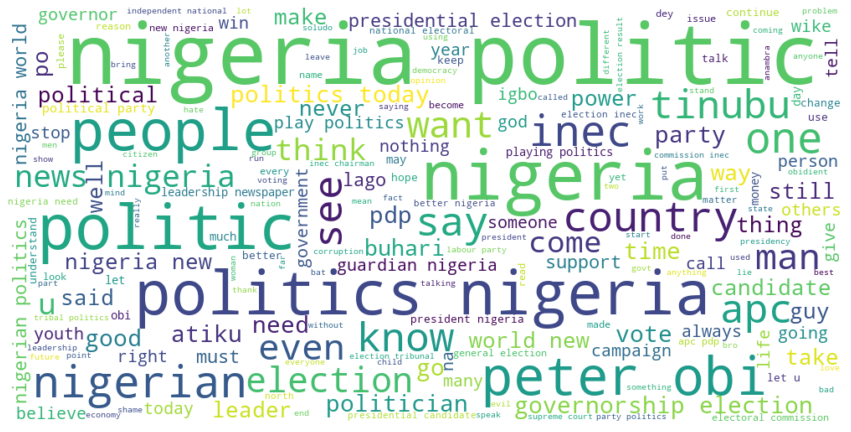

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['lemmatized']])

wordcloud = WordCloud(width=1000, height=500, random_state=42, max_font_size=100,background_color="white").generate(all_words)

# plot the graph
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Ploting a Wordcloud for News Label Fake in the dataset**

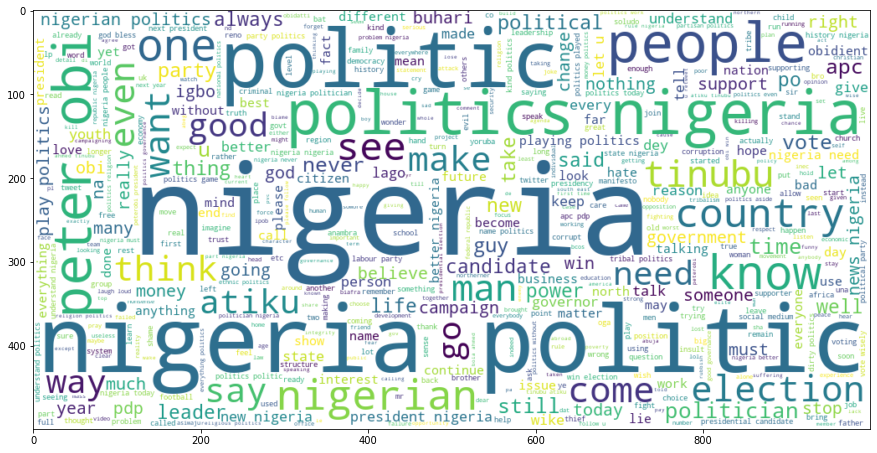

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , background_color="white", stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].lemmatized))
plt.imshow(wc , interpolation = 'bilinear')

### **Ploting a Wordcloud for News Label Real in the dataset**

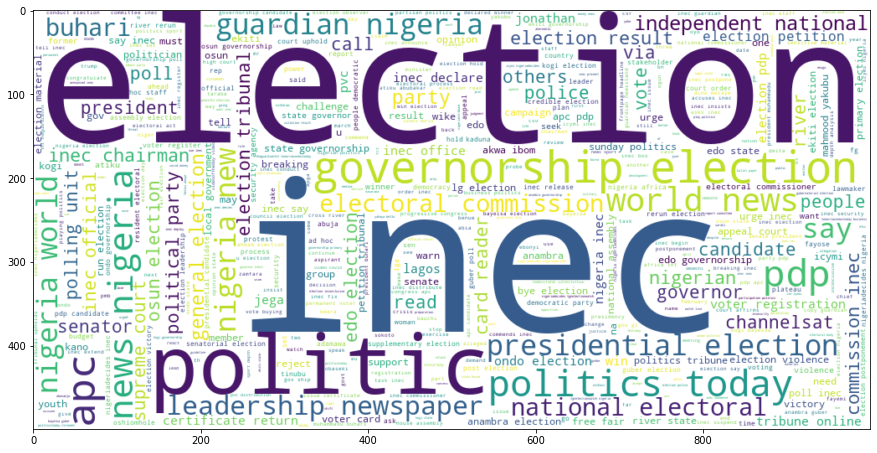

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 ,background_color="white", stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].lemmatized))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
df.head()
df.to_csv('testingdata1.csv')

### **Splitting my Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized'], df['label'], test_size=0.3, random_state=0)

### **Encoding of the Test & Train Data**

In [ ]:
# tokenize
max_features = 10000 # 100 * 100
maxlen = 256 # avg maxlen 225

token = Tokenizer(num_words=max_features)
token.fit_on_texts(X_train)

# tokenize train
tokenized_train = token.texts_to_sequences(X_train)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)

# tokenize test
tokenized_test = token.texts_to_sequences(X_test)
x_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
x_test

array([[   0,    0,    0, ...,   28, 6044,    1],
       [   0,    0,    0, ...,  303,   15, 1175],
       [   0,    0,    0, ...,    8, 2739, 4593],
       ...,
       [   0,    0,    0, ...,  537,   31,  830],
       [   0,    0,    0, ..., 2456,  769,   47],
       [   0,    0,    0, ...,   85,   23, 1341]], dtype=int32)

### **Instantiating the LSTM Model**

In [ ]:
from keras import regularizers
model = Sequential()
model.add(Embedding(max_features, output_dim=100, input_length=maxlen, trainable=False))

model.add(LSTM(units=64, return_sequences=True, recurrent_dropout=0.25, dropout=0.25,
               kernel_regularizer=regularizers.l2(0.025)))
model.add(LSTM(units=32, recurrent_dropout=0.1, dropout=0.1))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.025)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 100)          1000000   
                                                                 
 lstm_6 (LSTM)               (None, 256, 64)           42240     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,055,201
Trainable params: 55,201
Non-t

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
Checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)
# model.fit(callbacks=[early_stopping_callback, Checkpointer])

###  LSTM Model Training

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.3, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, Checkpointer])


Epoch 1/10
82/82 [==============================] - ETA: 0s - loss: 2.4881 - accuracy: 0.7343
Epoch 00001: val_loss improved from inf to 1.16247, saving model to ./model/01-1.1625.hdf5
82/82 [==============================] - 181s 2s/step - loss: 2.4881 - accuracy: 0.7343 - val_loss: 1.1625 - val_accuracy: 0.7747
Epoch 2/10
82/82 [==============================] - ETA: 0s - loss: 0.7889 - accuracy: 0.8128
Epoch 00002: val_loss improved from 1.16247 to 0.57599, saving model to ./model/02-0.5760.hdf5
82/82 [==============================] - 181s 2s/step - loss: 0.7889 - accuracy: 0.8128 - val_loss: 0.5760 - val_accuracy: 0.8267
Epoch 3/10
82/82 [==============================] - ETA: 0s - loss: 0.4814 - accuracy: 0.8603
Epoch 00003: val_loss improved from 0.57599 to 0.40636, saving model to ./model/03-0.4064.hdf5
82/82 [==============================] - 179s 2s/step - loss: 0.4814 - accuracy: 0.8603 - val_loss: 0.4064 - val_accuracy: 0.8778
Epoch 4/10
82/82 [=============================

### **Accuracy Evaluation Of the X_test against the Y_test**

In [ ]:
print('Accuracy: {:.4f}'.format(model.evaluate(x_test, y_test)[1]))

402/402 [==============================] - 34s 83ms/step - loss: 0.2343 - accuracy: 0.9411
Accuracy: 0.9411


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

pred = model.predict(x_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))


Accuracy on testing set: 0.9410894941634241
Precision on testing set: 0.9263959390862944
Recall on testing set: 0.971152499649909


### **Confusion Matrix Graph**



Precision, Recall, F1, for LSTM Model


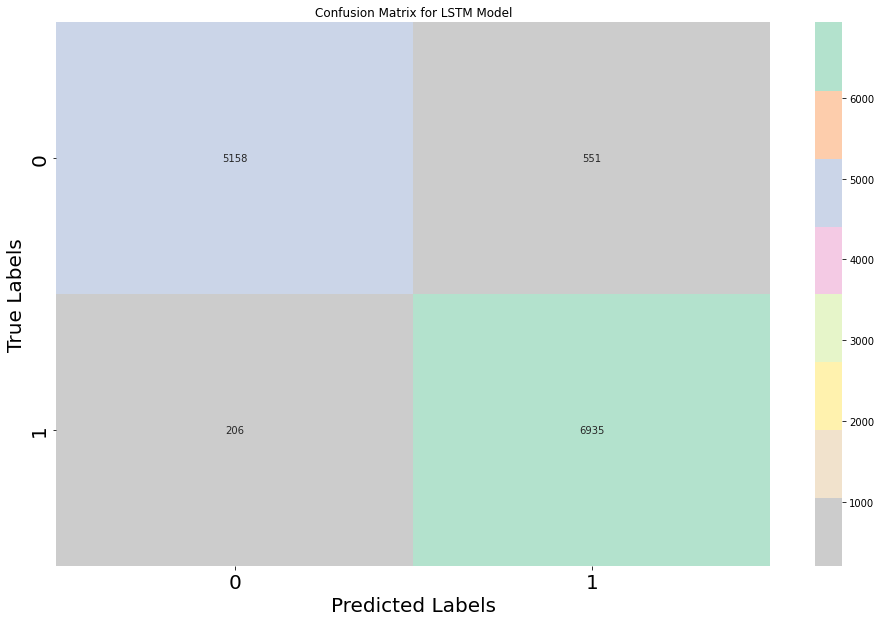

In [ ]:
import seaborn as sns
cma = confusion_matrix(binary_predictions, y_test)
print('\n')
print("Precision, Recall, F1, for LSTM Model")

fig, ax = plt.subplots(figsize = (16,10))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for LSTM Model');
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.xaxis.set_ticklabels([0,1], size=20)
ax.yaxis.set_ticklabels([0,1], size=20)

plt.show()

# **Accurracy Graph and Value loss Graph**

Text(0, 0.5, 'acc')

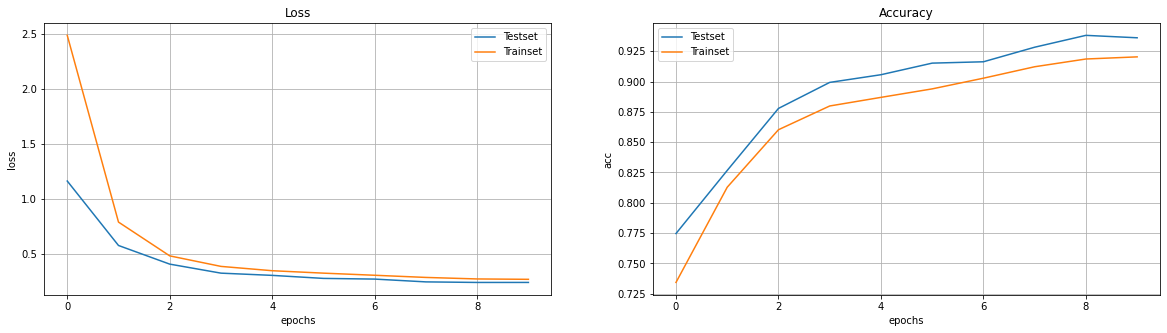

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_vloss))


plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(x_len, y_vloss, label='Testset')
plt.plot(x_len, y_loss, label='Trainset')
plt.grid()
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(x_len, y_vacc, label='Testset')
plt.plot(x_len, y_acc, label='Trainset')
plt.grid()
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')

# **Saving the LSTM Model as a pickel file**

In [ ]:
# print("[INFO] Saving model...")
# pickle.dump(model,open('lstm_model.pkl', 'wb'))

In [ ]:
x=df['lemmatized']
y= df['label']

# **Initializing Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['lemmatized'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow,y, test_size=0.3, random_state=0)

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(kernel = 'rbf', C=0.1)
model.fit(X_train, y_train)

SVC(C=0.1)

In [ ]:
y_pre=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [ ]:
score=accuracy_score(y_test,y_pre,normalize=True)

In [ ]:
print(f'Accuracy : {round(score, 4)*100}%')

Accuracy : 98.1%


In [ ]:
print("classification_report is : \n",classification_report(y_test,y_pre))

classification_report is : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5364
           1       0.99      0.98      0.98      7486

    accuracy                           0.98     12850
   macro avg       0.98      0.98      0.98     12850
weighted avg       0.98      0.98      0.98     12850





Precision, Recall, F1, for SVM model


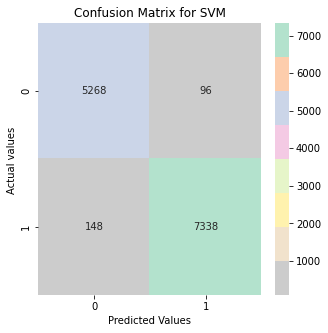

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, y_pre)
print('\n')
print("Precision, Recall, F1, for SVM model")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for SVM');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Hyperparameter tunning for Support Vector Machine Model**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
# grid = GridSearchCV(SVC(), param_grid, cv=5)
# grid.fit(X_train, y_train)

# print("Best parameters: ", grid.best_params_)
# print("Best score: ", grid.best_score_)


# **Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

In [ ]:
test_pred_NB_all = NB_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import f1_score
print("F1 score is: ", f1_score(y_test, test_pred_NB_all ))

F1 score is:  0.9441930618401206


In [ ]:
print(classification_report(y_test, test_pred_NB_all))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5364
           1       0.93      0.96      0.94      7486

    accuracy                           0.93     12850
   macro avg       0.94      0.93      0.93     12850
weighted avg       0.93      0.93      0.93     12850





Precision, Recall, F1, for Naive Bayes model


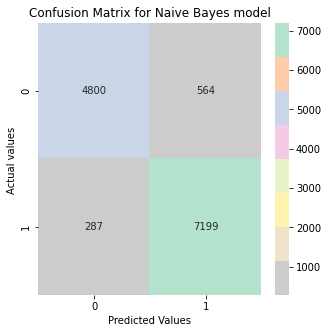

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, test_pred_NB_all)
print('\n')
print("Precision, Recall, F1, for Naive Bayes model")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Naive Bayes model');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Naive Bayes hyperparameter tunning**

In [ ]:
param_grid = {'alpha': [0.1, 1, 10]}


In [ ]:
from sklearn.model_selection import GridSearchCV
NB_classifier = MultinomialNB()
grid_search = GridSearchCV(NB_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1, 10]}, scoring='accuracy')

In [ ]:
best_NB = grid_search.best_estimator_


In [ ]:
grid_search.best_params_


{'alpha': 0.1}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# make predictions on the test set
y_pred = best_NB.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# calculate f1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

#generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9343190661478599
Precision: 0.9347051461873607
Recall: 0.9343190661478599
F1-Score: 0.9340373928109253
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5364
           1       0.93      0.96      0.94      7486

    accuracy                           0.93     12850
   macro avg       0.94      0.93      0.93     12850
weighted avg       0.93      0.93      0.93     12850



# **RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
RFC_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [ ]:
pred_rfc = RFC_model.predict(X_test)

In [ ]:
RFC_model.score(X_test,y_test)

0.9347081712062257

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      5364
           1       0.90      0.99      0.95      7486

    accuracy                           0.93     12850
   macro avg       0.95      0.92      0.93     12850
weighted avg       0.94      0.93      0.93     12850





Precision, Recall, F1, for Random Forest Classifier


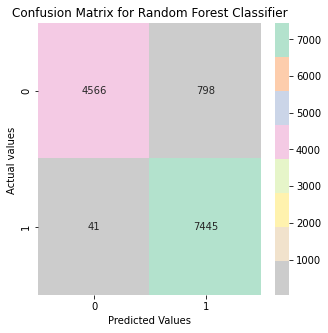

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, pred_rfc)
print('\n')
print("Precision, Recall, F1, for Random Forest Classifier")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Random Forest Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Random Forest Hyperparameter Tuning**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {'n_estimators': [50, 100, 200],
#               'max_depth': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt']}
# grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid.fit(X_train, y_train)

# print("Best parameters: ", grid.best_params_)
# print("Best score: ", grid.best_score_)


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(X_test)

In [ ]:
DT.score(X_test, y_test)

0.9703501945525291

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5364
           1       0.98      0.96      0.97      7486

    accuracy                           0.97     12850
   macro avg       0.97      0.97      0.97     12850
weighted avg       0.97      0.97      0.97     12850





Precision, Recall, F1, for Decision Tree Classifier


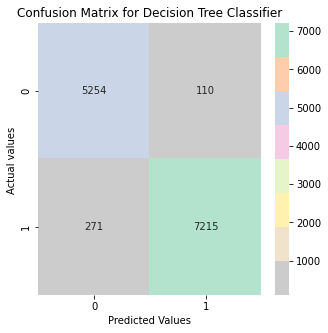

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, pred_dt)
print('\n')
print("Precision, Recall, F1, for Decision Tree Classifier")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Decision Tree Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Decision tree hyperparameter tuning**

In [ ]:
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 3, 4]}


In [ ]:
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeClassifier()
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
best_dt = grid_search.best_estimator_


In [ ]:
grid_search.best_params_


{'max_depth': 7, 'min_samples_split': 2}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# make predictions on the test set
y_pred = best_dt.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# calculate f1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-Score:", f1)

#generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9842023346303502
Precision: 0.9842882431672901
Recall: 0.9842023346303502
F1-Score: 0.9842162422929943
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5364
           1       0.99      0.98      0.99      7486

    accuracy                           0.98     12850
   macro avg       0.98      0.98      0.98     12850
weighted avg       0.98      0.98      0.98     12850



# **Initializing TF-IDF (term frequency-inverse document frequency) Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['lemmatized'])

In [ ]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(tfidf, df['label'], test_size=0.3, random_state=0)

# **Initializing Support Vector Model**

In [ ]:
model=SVC(kernel = 'rbf', C=0.1)
model.fit(Xt_train, yt_train)

SVC(C=0.1)

In [ ]:
yt_pre=model.predict(Xt_test)

In [ ]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [ ]:
score=accuracy_score(yt_test,yt_pre,normalize=True)

In [ ]:
print(f'Accuracy : {round(score, 4)*100}%')

Accuracy : 96.58%


In [ ]:
print("classification_report is : \n",classification_report(yt_test,yt_pre))

classification_report is : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      5364
           1       0.96      0.99      0.97      7486

    accuracy                           0.97     12850
   macro avg       0.97      0.96      0.96     12850
weighted avg       0.97      0.97      0.97     12850





Precision, Recall, F1, for Support Vector Model


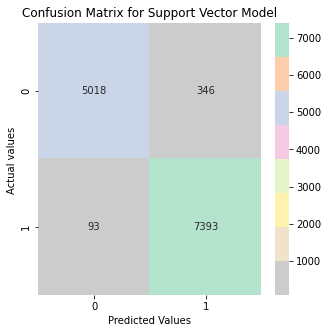

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, yt_pre)
print('\n')
print("Precision, Recall, F1, for Support Vector Model")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Support Vector Model');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Initializing Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(Xt_train, yt_train)

MultinomialNB()

In [ ]:
ctest_pred_NB_all = NB_classifier.predict(Xt_test)

In [ ]:
from sklearn.metrics import f1_score
print("F1 score is: ", f1_score(yt_test, ctest_pred_NB_all ))

F1 score is:  0.9495659089402876


In [ ]:

print(classification_report(yt_test, ctest_pred_NB_all))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5364
           1       0.94      0.96      0.95      7486

    accuracy                           0.94     12850
   macro avg       0.94      0.94      0.94     12850
weighted avg       0.94      0.94      0.94     12850





Precision, Recall, F1, for Naive Bayes model


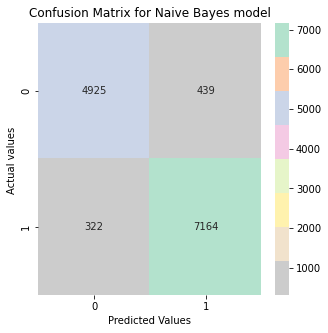

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, ctest_pred_NB_all)
print('\n')
print("Precision, Recall, F1, for Naive Bayes model")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Naive Bayes model');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

### **Initializing Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#RFC_model = RandomForestClassifier(random_state=0)
RFC_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
RFC_model.fit(Xt_train, yt_train)

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [ ]:
pred_rfc = RFC_model.predict(Xt_test)

In [ ]:
RFC_model.score(Xt_test,yt_test)

0.9256809338521401

In [ ]:
print(classification_report(yt_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      5364
           1       0.89      1.00      0.94      7486

    accuracy                           0.93     12850
   macro avg       0.94      0.91      0.92     12850
weighted avg       0.93      0.93      0.92     12850





Precision, Recall, F1, for Random Forest Classifier


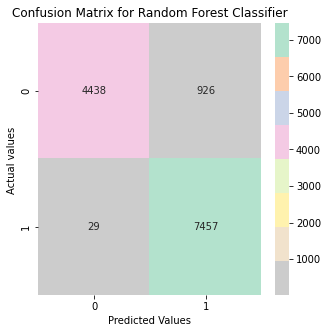

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, pred_rfc)
print('\n')
print("Precision, Recall, F1, for Random Forest Classifier")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Random Forest Classifier');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()

# **Intializing Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(Xt_train, yt_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(Xt_test)

In [ ]:
print(DT.score(Xt_test, yt_test))

0.980544747081712


In [ ]:
print(classification_report(yt_test, pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5364
           1       0.98      0.98      0.98      7486

    accuracy                           0.98     12850
   macro avg       0.98      0.98      0.98     12850
weighted avg       0.98      0.98      0.98     12850





Precision, Recall, F1, for Decision Tree Model


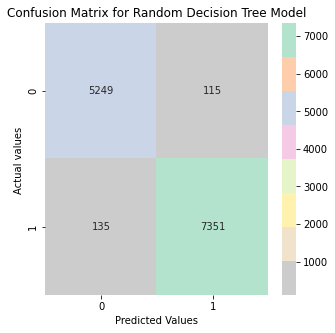

In [ ]:
import seaborn as sns
cma = confusion_matrix(y_test, pred_dt)
print('\n')
print("Precision, Recall, F1, for Decision Tree Model")

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.heatmap(cma, annot = True, cmap = 'Pastel2_r', fmt = '')

ax.set_title('Confusion Matrix for Random Decision Tree Model');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual values ');

plt.show()